In [1]:
import pandas as pd
import numpy as np

def main():
    # 0) Load data
    df = pd.read_csv('MotorBike_Accident_Severity_Analysis.csv')

    # 1) Basic info
    print("="*80)
    print("DATA OVERVIEW")
    print("="*80)
    print("Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nMissing values per column:\n", df.isnull().sum())
    print("\nNumeric summary:\n", df.describe())

    # 2) Severity distribution
    print("\n" + "="*80)
    print("1. ACCIDENT SEVERITY DISTRIBUTION")
    print("="*80)
    severity_dist = df['Accident_Severity'].value_counts()
    severity_pct = df['Accident_Severity'].value_counts(normalize=True) * 100
    severity_table = pd.DataFrame({'Count': severity_dist, 'Percentage': severity_pct.round(2)})
    print(severity_table)

    # 3) Alcohol vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("2. ALCOHOL CONSUMPTION BY SEVERITY (column %)")
    print("="*80)
    alcohol_severity = pd.crosstab(df['Biker_Alcohol'], df['Accident_Severity'], normalize='columns') * 100
    print(alcohol_severity.round(2))

    # 4) License validity vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("3. LICENSE VALIDITY BY SEVERITY (column %)")
    print("="*80)
    license_severity = pd.crosstab(df['Valid_Driving_License'], df['Accident_Severity'], normalize='columns') * 100
    print(license_severity.round(2))

    # 5) Age groups vs severity (row-normalized percentages within age group)
    print("\n" + "="*80)
    print("4. AGE GROUP ANALYSIS (row % within age group)")
    print("="*80)
    age_bins = [15, 25, 35, 45, 55, 70]
    age_labels = ['15-25', '26-35', '36-45', '46-55', '56-70']
    df['Age_Group'] = pd.cut(df['Biker_Age'], bins=age_bins, labels=age_labels, include_lowest=True)
    age_severity = pd.crosstab(df['Age_Group'], df['Accident_Severity'], normalize='index') * 100
    print(age_severity.round(2))

    # 6) Demographic statistics by severity (means)
    print("\n" + "="*80)
    print("5. DEMOGRAPHIC STATISTICS BY SEVERITY (means)")
    print("="*80)
    demo_stats = df.groupby('Accident_Severity')[['Biker_Age', 'Riding_Experience', 'Daily_Travel_Distance']].mean()
    print(demo_stats.round(2))

    # 7) Road type vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("6. ROAD TYPE BY SEVERITY (column %)")
    print("="*80)
    road_severity = pd.crosstab(df['Road_Type'], df['Accident_Severity'], normalize='columns') * 100
    print(road_severity.round(2))

    # 8) Weather vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("7. WEATHER CONDITIONS BY SEVERITY (column %)")
    print("="*80)
    weather_severity = pd.crosstab(df['Weather'], df['Accident_Severity'], normalize='columns') * 100
    print(weather_severity.round(2))

    # 9) Time of day vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("8. TIME OF DAY BY SEVERITY (column %)")
    print("="*80)
    time_severity = pd.crosstab(df['Time_of_Day'], df['Accident_Severity'], normalize='columns') * 100
    print(time_severity.round(2))

    # 10) Helmet usage vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("9. HELMET USAGE BY SEVERITY (column %)")
    print("="*80)
    helmet_severity = pd.crosstab(df['Wearing_Helmet'], df['Accident_Severity'], normalize='columns') * 100
    print(helmet_severity.round(2))

    # 11) Speed statistics by severity
    print("\n" + "="*80)
    print("10. SPEED STATISTICS BY SEVERITY (means)")
    print("="*80)
    speed_stats = df.groupby('Accident_Severity')[['Bike_Speed', 'Speed_Limit']].mean()
    speed_stats['Speed_Excess'] = speed_stats['Bike_Speed'] - speed_stats['Speed_Limit']
    print(speed_stats.round(2))

    # 12) Road condition vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("11. ROAD CONDITION BY SEVERITY (column %)")
    print("="*80)
    road_cond_severity = pd.crosstab(df['Road_condition'], df['Accident_Severity'], normalize='columns') * 100
    print(road_cond_severity.round(2))

    # 13) Occupation vs severity (column-normalized percentages)
    print("\n" + "="*80)
    print("12. OCCUPATION BY SEVERITY (column %)")
    print("="*80)
    occupation_severity = pd.crosstab(df['Biker_Occupation'], df['Accident_Severity'], normalize='columns') * 100
    print(occupation_severity.round(2))

    # 14) Optional: save all key tables to CSVs for report tables
    severity_table.to_csv('out_severity_distribution.csv')
    alcohol_severity.round(2).to_csv('out_alcohol_by_severity.csv')
    license_severity.round(2).to_csv('out_license_by_severity.csv')
    age_severity.round(2).to_csv('out_agegroup_by_severity.csv')
    demo_stats.round(2).to_csv('out_demographics_by_severity.csv')
    road_severity.round(2).to_csv('out_roadtype_by_severity.csv')
    weather_severity.round(2).to_csv('out_weather_by_severity.csv')
    time_severity.round(2).to_csv('out_time_by_severity.csv')
    helmet_severity.round(2).to_csv('out_helmet_by_severity.csv')
    speed_stats.round(2).to_csv('out_speed_by_severity.csv')
    road_cond_severity.round(2).to_csv('out_roadcondition_by_severity.csv')
    occupation_severity.round(2).to_csv('out_occupation_by_severity.csv')

    # 15) Optional: quick checks used in the narrative
    print("\n" + "="*80)
    print("CHECKS FOR NARRATIVE HIGHLIGHTS")
    print("="*80)
    # Alcohol positive share within severe vs no-accident
    alcohol_col = 'Biker_Alcohol'
    sev = 'Severe Accident'
    noacc = 'No Accident'
    severe_alcohol_pct = (df[df['Accident_Severity'] == sev][alcohol_col].mean()) * 100
    noacc_alcohol_pct = (df[df['Accident_Severity'] == noacc][alcohol_col].mean()) * 100
    print(f"Alcohol positive in Severe Accident: {severe_alcohol_pct:.2f}%")
    print(f"Alcohol positive in No Accident: {noacc_alcohol_pct:.2f}%")

    # License invalid share within severe vs no-accident
    license_col = 'Valid_Driving_License'
    severe_invalid_pct = (df[df['Accident_Severity'] == sev][license_col].eq('No').mean()) * 100
    noacc_invalid_pct = (df[df['Accident_Severity'] == noacc][license_col].eq('No').mean()) * 100
    print(f"License invalid in Severe Accident: {severe_invalid_pct:.2f}%")
    print(f"License invalid in No Accident: {noacc_invalid_pct:.2f}%")

    # Highway share within severe
    highway_share_severe = (df[df['Accident_Severity'] == sev]['Road_Type'].eq('Highway').mean()) * 100
    print(f"Highway share in Severe Accident: {highway_share_severe:.2f}%")

    # Age group severe proportion for 15-25
    age_grp = 'Age_Group'
    severe_by_agegrp = pd.crosstab(df[age_grp], df['Accident_Severity'], normalize='index') * 100
    if '15-25' in severe_by_agegrp.index:
        print(f"Severe proportion in age 15-25: {severe_by_agegrp.loc['15-25', sev]:.2f}%")

if __name__ == "__main__":
    main()


DATA OVERVIEW
Shape: (15102, 21)

Columns: ['Biker_Age', 'Biker_Occupation', 'Biker_Education_Level', 'Riding_Experience', 'Daily_Travel_Distance', 'Talk_While_Riding', 'Smoke_While_Riding', 'Wearing_Helmet', 'Motorcycle_Ownership', 'Valid_Driving_License', 'Bike_Condition', 'Road_Type', 'Road_condition', 'Weather', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit', 'Bike_Speed', 'Number_of_Vehicles', 'Biker_Alcohol', 'Accident_Severity']

Missing values per column:
 Biker_Age                2
Biker_Occupation         2
Biker_Education_Level    2
Riding_Experience        2
Daily_Travel_Distance    2
Talk_While_Riding        2
Smoke_While_Riding       2
Wearing_Helmet           2
Motorcycle_Ownership     2
Valid_Driving_License    2
Bike_Condition           2
Road_Type                2
Road_condition           2
Weather                  2
Time_of_Day              2
Traffic_Density          2
Speed_Limit              2
Bike_Speed               2
Number_of_Vehicles       2
Biker_Alcohol    

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
df = pd.read_csv("MotorBike_Accident_Severity_Analysis.csv")

# Plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Output directory for charts
output_dir = "accident_charts"
os.makedirs(output_dir, exist_ok=True)

# Helper function for bar plots
def save_percentage_crosstab(df, feature, target='Accident_Severity', title='', fname='chart.png'):
    cross_tab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ax = cross_tab.plot(kind='bar', figsize=(8,5))
    plt.title(title, fontsize=14, weight='bold')
    plt.ylabel("Percentage (%)")
    plt.xlabel(feature.replace("_", " "))
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')

    # ✅ Add full border around figure
    fig = ax.get_figure()
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(3)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, fname), dpi=300)
    plt.show()


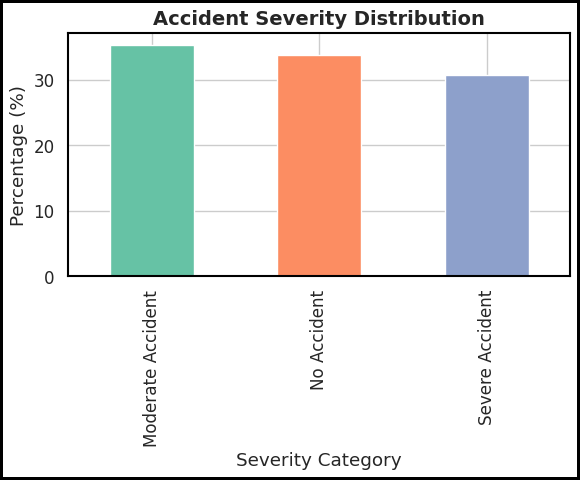

In [18]:
plt.figure(figsize=(6,5))
df['Accident_Severity'].value_counts(normalize=True).mul(100).plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Accident Severity Distribution", fontsize=14, weight='bold')
for spine in plt.gca().spines.values(): spine.set_visible(True); spine.set_linewidth(1.5); spine.set_color("black")

plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)

plt.ylabel("Percentage (%)")
plt.xlabel("Severity Category")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "1_Severity_Distribution.png"), dpi=300)
plt.show()


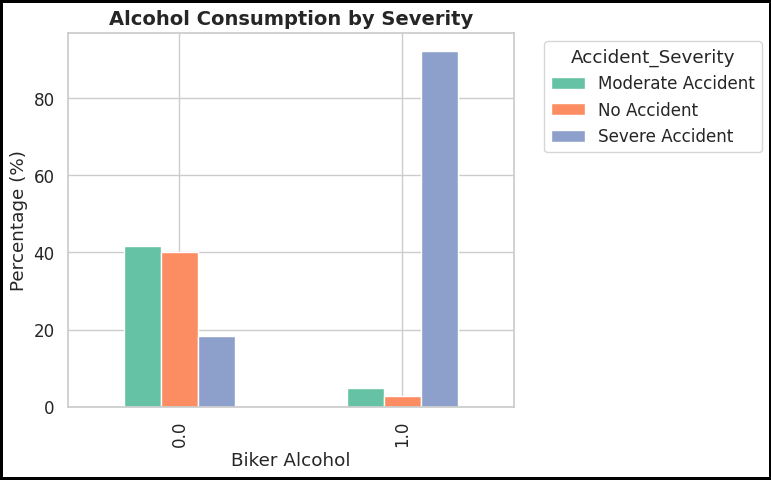

<Figure size 640x480 with 0 Axes>

In [20]:
save_percentage_crosstab(df, 'Biker_Alcohol', title="Alcohol Consumption by Severity", fname="2_Alcohol_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)




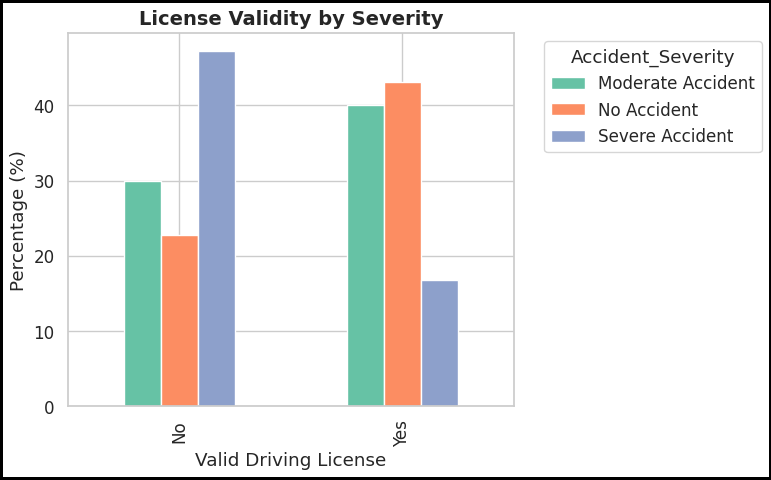

<Figure size 640x480 with 0 Axes>

In [21]:
save_percentage_crosstab(df, 'Valid_Driving_License', title="License Validity by Severity", fname="3_License_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)




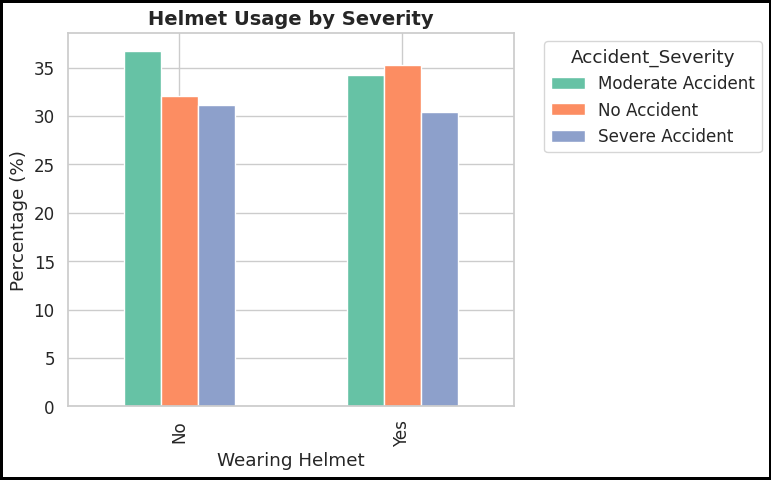

<Figure size 640x480 with 0 Axes>

In [22]:
save_percentage_crosstab(df, 'Wearing_Helmet', title="Helmet Usage by Severity", fname="4_Helmet_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)



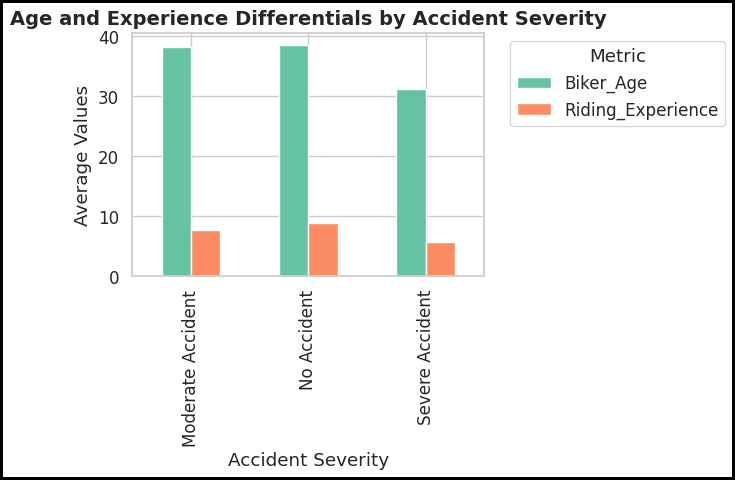

In [32]:
# Age and Experience Differentials — Table 5 Visualization

demo_stats = df.groupby('Accident_Severity')[['Biker_Age', 'Riding_Experience', 'Daily_Travel_Distance']].mean().round(2)

ax = demo_stats[['Biker_Age', 'Riding_Experience']].plot(kind='bar', figsize=(7,5))
plt.title("Age and Experience Differentials by Accident Severity", fontsize=14, weight='bold')
plt.ylabel("Average Values")
plt.xlabel("Accident Severity")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# ✅ Add black border around entire chart
fig = ax.get_figure()
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Age_Experience_Differentials.png"), dpi=300)
plt.show()


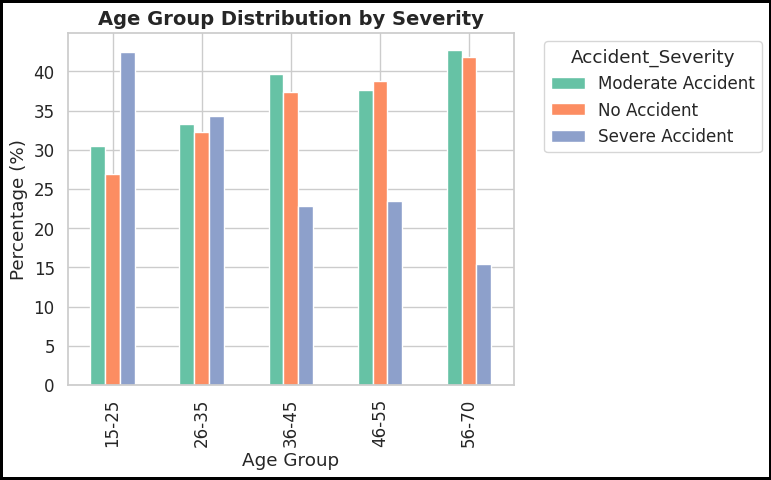

<Figure size 640x480 with 0 Axes>

In [23]:
age_bins = [15, 25, 35, 45, 55, 70]
age_labels = ['15-25', '26-35', '36-45', '46-55', '56-70']
df['Age_Group'] = pd.cut(df['Biker_Age'], bins=age_bins, labels=age_labels, include_lowest=True)
save_percentage_crosstab(df, 'Age_Group', title="Age Group Distribution by Severity", fname="5_AgeGroup_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)


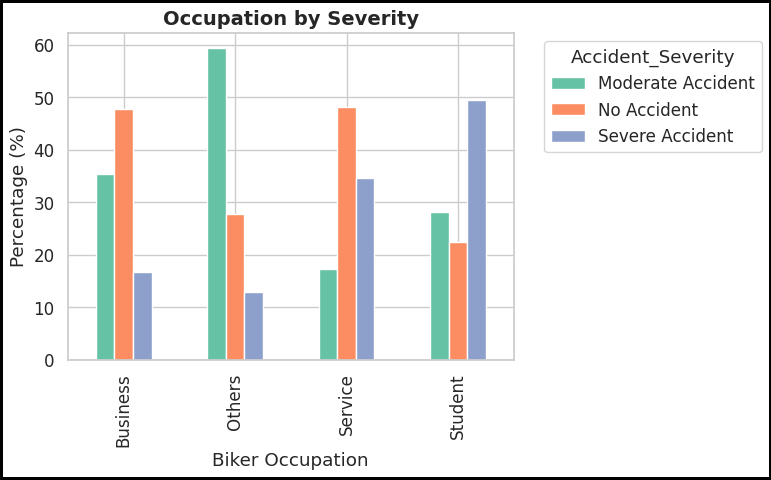

<Figure size 640x480 with 0 Axes>

In [24]:
save_percentage_crosstab(df, 'Biker_Occupation', title="Occupation by Severity", fname="6_Occupation_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)



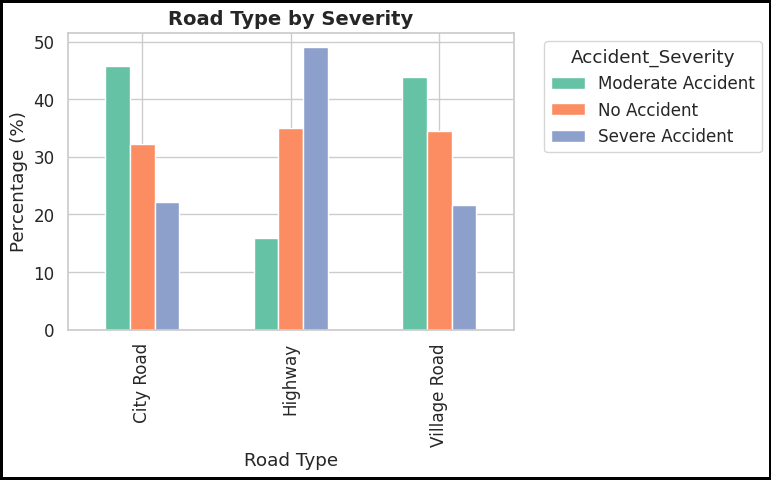

<Figure size 640x480 with 0 Axes>

In [25]:
save_percentage_crosstab(df, 'Road_Type', title="Road Type by Severity", fname="7_RoadType_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)


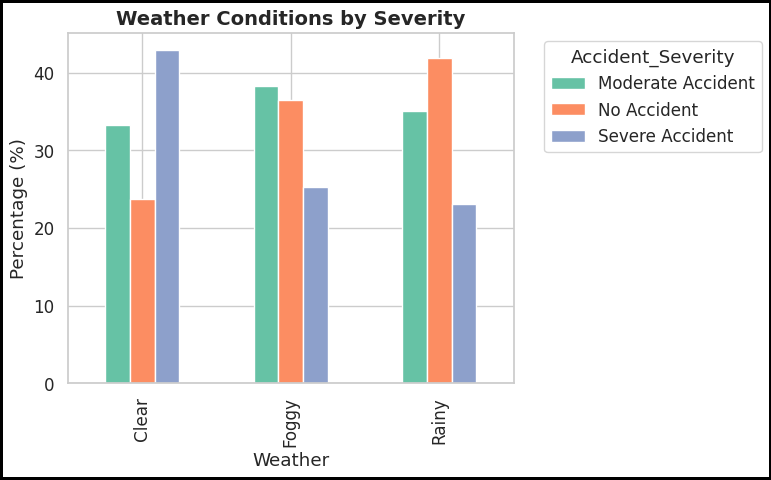

<Figure size 640x480 with 0 Axes>

In [26]:
save_percentage_crosstab(df, 'Weather', title="Weather Conditions by Severity", fname="8_Weather_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)


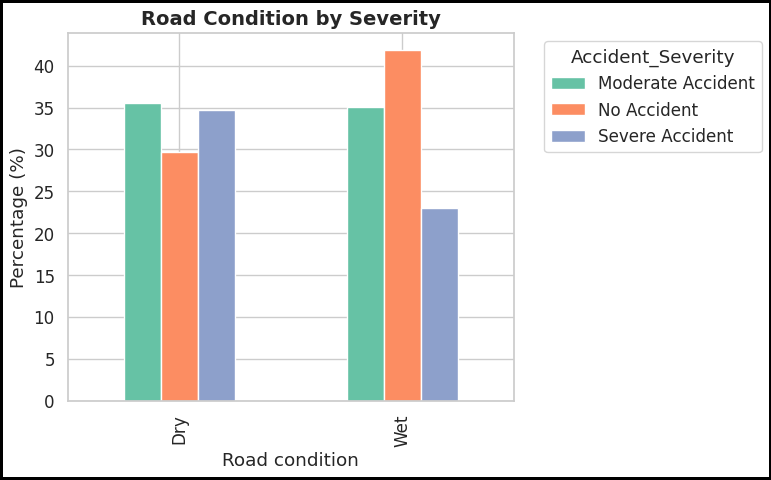

<Figure size 640x480 with 0 Axes>

In [27]:
save_percentage_crosstab(df, 'Road_condition', title="Road Condition by Severity", fname="9_RoadCondition_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)


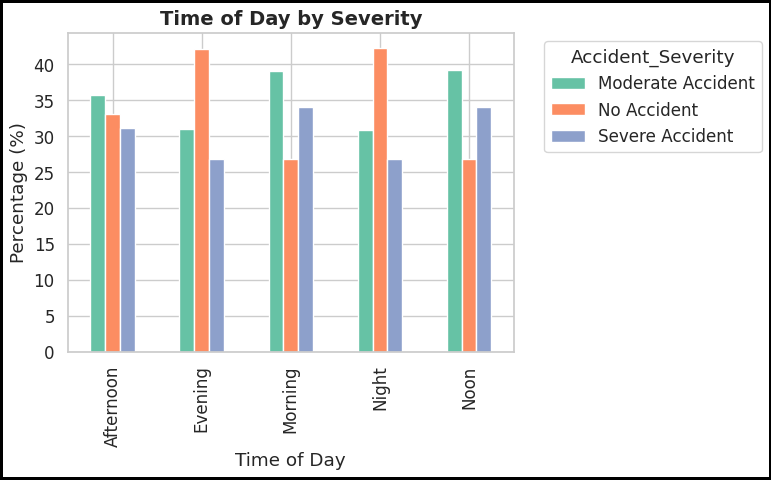

<Figure size 640x480 with 0 Axes>

In [28]:
save_percentage_crosstab(df, 'Time_of_Day', title="Time of Day by Severity", fname="10_TimeOfDay_by_Severity.png")
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)


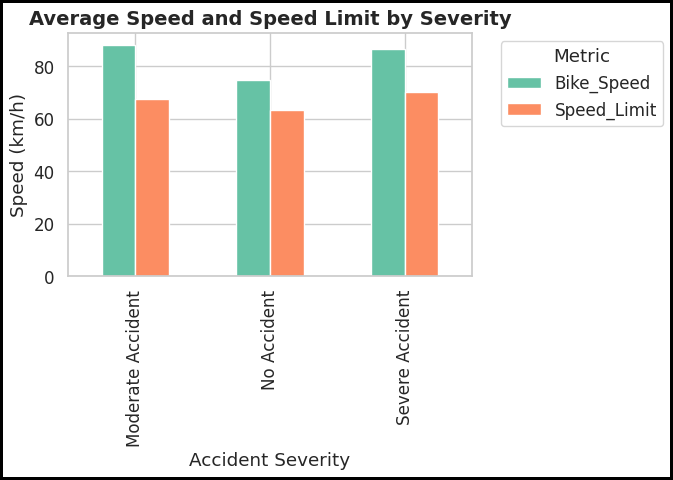

In [30]:
speed_stats = df.groupby('Accident_Severity')[['Bike_Speed', 'Speed_Limit']].mean().round(2)
speed_stats.plot(kind='bar', figsize=(7,5))
plt.title("Average Speed and Speed Limit by Severity", fontsize=14, weight='bold')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)

plt.ylabel("Speed (km/h)")
plt.xlabel("Accident Severity")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "11_Speed_by_Severity.png"), dpi=300)
plt.show()


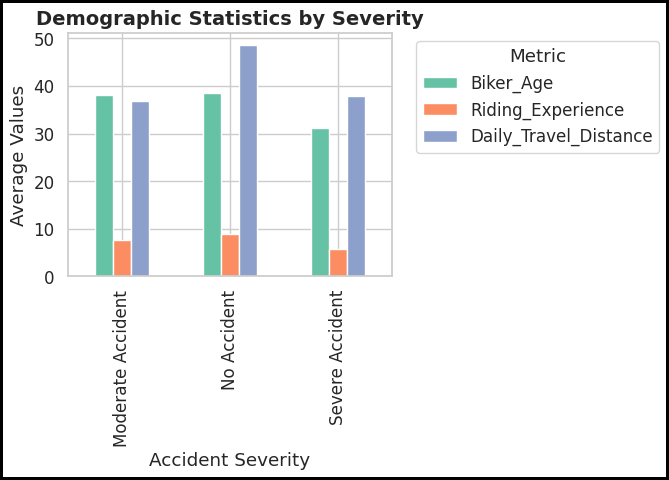

In [31]:
demo_stats = df.groupby('Accident_Severity')[['Biker_Age', 'Riding_Experience', 'Daily_Travel_Distance']].mean().round(2)
demo_stats.plot(kind='bar', figsize=(7,5))
plt.title("Demographic Statistics by Severity", fontsize=14, weight='bold')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(3)

plt.ylabel("Average Values")
plt.xlabel("Accident Severity")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "12_Demographics_by_Severity.png"), dpi=300)
plt.show()

